# Nonparametric models

* Kernel density estimation
    * Input data is discrete (e.g. sightings ofa particular species in space)
    * Estimate probability distributiuon from a sample
    * Can also be used as a generative model (draw samples from approximate probability distributions
* Gaussian processes
    * Input data is continuous (e.g. rainfall recordings taken at random intervals)
    * Uses correlations between training data points to predict test data points in interval
    * Uses correlations between training data points to predict test data points in interval
    * Also can be used as a generative model (whole lines can be drawn from a fitted model)
    * Can be generalised to higher dimensions (Gaussian random field)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv")

You can use pandas to read csv and excel tables! Woohoo!

In [6]:
data.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [7]:
data.columns.values

array(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize',
       'population', 'poll_wt', 'rawpoll_clinton', 'rawpoll_trump',
       'rawpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_clinton',
       'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin',
       'multiversions', 'url', 'poll_id', 'question_id', 'createddate',
       'timestamp'], dtype=object)

In [8]:
data.pollster.value_counts()

Ipsos                                                         2757
Google Consumer Surveys                                       2229
SurveyMonkey                                                  1980
YouGov                                                         390
Rasmussen Reports/Pulse Opinion Research                       375
USC Dornsife/LA Times                                          363
CVOTER International                                           345
The Times-Picayune/Lucid                                       324
Public Policy Polling                                          264
Gravis Marketing                                               222
Emerson College                                                216
Quinnipiac University                                          180
Morning Consult                                                171
Marist College                                                 141
SurveyUSA                                                     

Notice the use of the . hierarchy!

In [9]:
print('president rows {} out of total rows {}'.format(np.sum(data.branch == 'President'),len(data.index)))

president rows 12624 out of total rows 12624


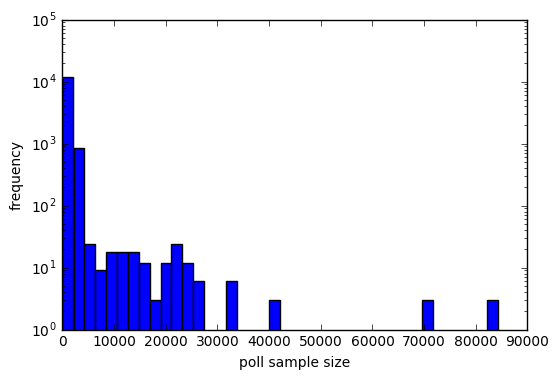

In [10]:
plt.hist(data.samplesize.dropna().values,bins=40);
plt.yscale('log');
plt.ylabel('frequency'); plt.xlabel('poll sample size');

## Clean the Data

In [11]:
data.forecastdate = pd.to_datetime(data.forecastdate)
data.createddate = pd.to_datetime(data.createddate)

In [12]:
data['time2election'] = pd.to_datetime(data.createddate) - pd.datetime(2016,11,8)
data['time2election'] = data['time2election']/ np.timedelta64(1,'D')

In [13]:
national_data = data[data.state=='U.S.']

In [14]:
len(national_data.index)

3318

Remove NAs from poll date or sample size:

In [15]:
national_data = national_data[np.isfinite(national_data.samplesize)]

'isfinite' returns a boolean vector distinguishing numbers from NA's

In [16]:
national_data.samplesize.values.shape

(3318,)

## Kernel density estimation of pollster times

In [17]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

Plot a 1D density example

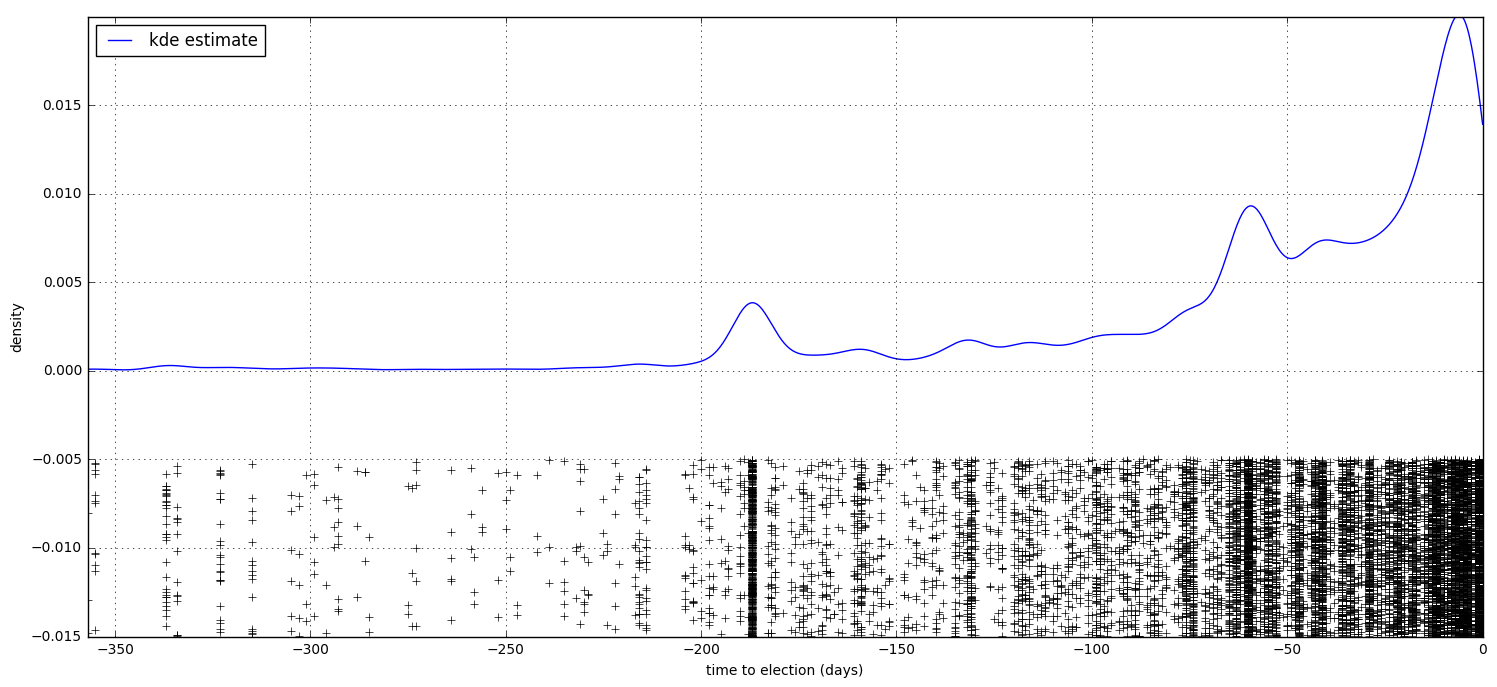

In [18]:
N = 100
np.random.seed(1)
X = np.atleast_2d(data.time2election).T

X_plot = np.atleast_2d(np.linspace(X.min(),0,1000)).T
plt.figure(figsize=(18,8))

kde = KernelDensity(kernel='gaussian', bandwidth = 5.0).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:,0], np.exp(log_dens), '-', label = "kde estimate")

plt.legend(loc='upper left')
plt.plot(X[:,0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

plt.xlim(X.min(),0)
plt.ylim(-0.015,0.02)
plt.grid()
plt.xlabel('time to election (days)')
plt.ylabel('density')
plt.show()

## Predict popular vote using data from pollster

Only look at one pollster to reduce data size

In [19]:
national_data = national_data[national_data.pollster == 'YouGov']

In [20]:
len(national_data.index)

84

## Gaussian Process Regressor

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In what follows, the function 'np.atleast_2d' takes an input and turns into an array. The reason we're using it in this context is because the data-set that we have in an object within the Pandas API.

In [24]:
mpoll = np.mean(national_data.rawpoll_clinton)
sigpoll = 100.
p_clinton = np.array(national_data.rawpoll_clinton/sigpoll)
X = (np.atleast_2d(national_data.time2election).T).astype(float)
y = p_clinton - (mpoll)/sigpoll
#dy = 0.1*np.ones(len(y))/sigpoll # this is a one point error
dy = p_clinton*(1-p_clinton)/national_data.samplesize.values

In [25]:
#kernel = C(1.0, (1e-3,1e3))*RBF(7.,(1e-2,30.))
#kernel = 1.0*RBF(length_Scale=7.0, length_scale_bounds=(1e-2,30.)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2,1e2))

In [26]:
gp = GaussianProcessRegressor(kernel=kernel, alpha = (dy/y)**2, n_restarts_optimizer=10)

In [27]:
gp.fit(X,y)

GaussianProcessRegressor(alpha=array([  6.64729e-06,   3.23786e-07, ...,   3.45432e-05,   5.93777e-04]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [28]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
x = np.atleast_2d(np.linspace(-250.,0,1000)).T
y_pred, sigma = gp.predict(x, return_std=True)

Ok, so somewhere along the line he tried different kernel attempts until arriving at the one that we wanted. Using that, he trained the dataset so that we could now make a prediction (by means of the 'predict' feature of the model) of who would win the election) ** note that the model ended up being wrong **

But should still look into using this in finance!

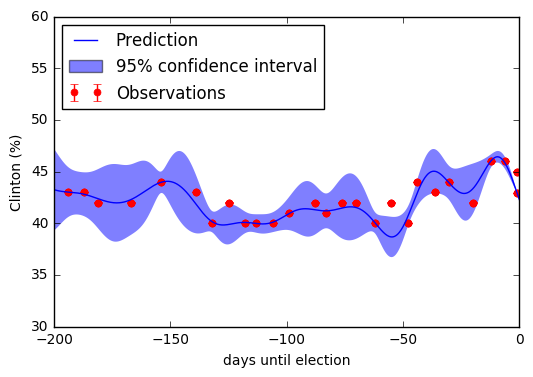

In [32]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
py = sigpoll*y+mpoll
pdy = sigpoll*dy
py_pred = sigpoll*y_pred+mpoll
psigma = sigpoll*sigma 
plt.errorbar(X.ravel(), py, pdy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, py_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([py_pred - 1.9600 * psigma,
                        (py_pred + 1.9600 * psigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('days until election')
plt.ylabel('Clinton (%)')
plt.ylim(30., 60.)
plt.xlim(-200.,0.)
plt.legend(loc='upper left')

plt.show()

## Next Steps

* To use more realistic noise model by introducing sample errors
* Make a fit to other polling companies (**ah, so most likely the data was spurious...**)
* Repeat the analysis for Trump and compare to make a prediction for the popular vote
* Extend the model to include biases across polling companies (this is the smartest thing to do)

In [35]:
mpoll = np.mean(national_data.rawpoll_trump)
sigpoll = 100.
p_trump = np.array(national_data.rawpoll_trump/sigpoll)
Ty = p_trump - (mpoll)/sigpoll
#dy = 0.1*np.ones(len(y))/sigpoll # this is a one point error
Tdy = (p_trump*(1-p_trump)/national_data.samplesize.values)

In [37]:
Tgp = GaussianProcessRegressor(kernel=kernel, alpha=(Tdy / Ty) ** 2,
                              n_restarts_optimizer=10)
Tgp.fit(X, Ty)  

GaussianProcessRegressor(alpha=array([  9.11887e-06,   2.49800e-06, ...,   4.73870e-05,   2.16523e-05]),
             copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [38]:
# Predict for Trump
Ty_pred, Tsigma = Tgp.predict(x, return_std=True)

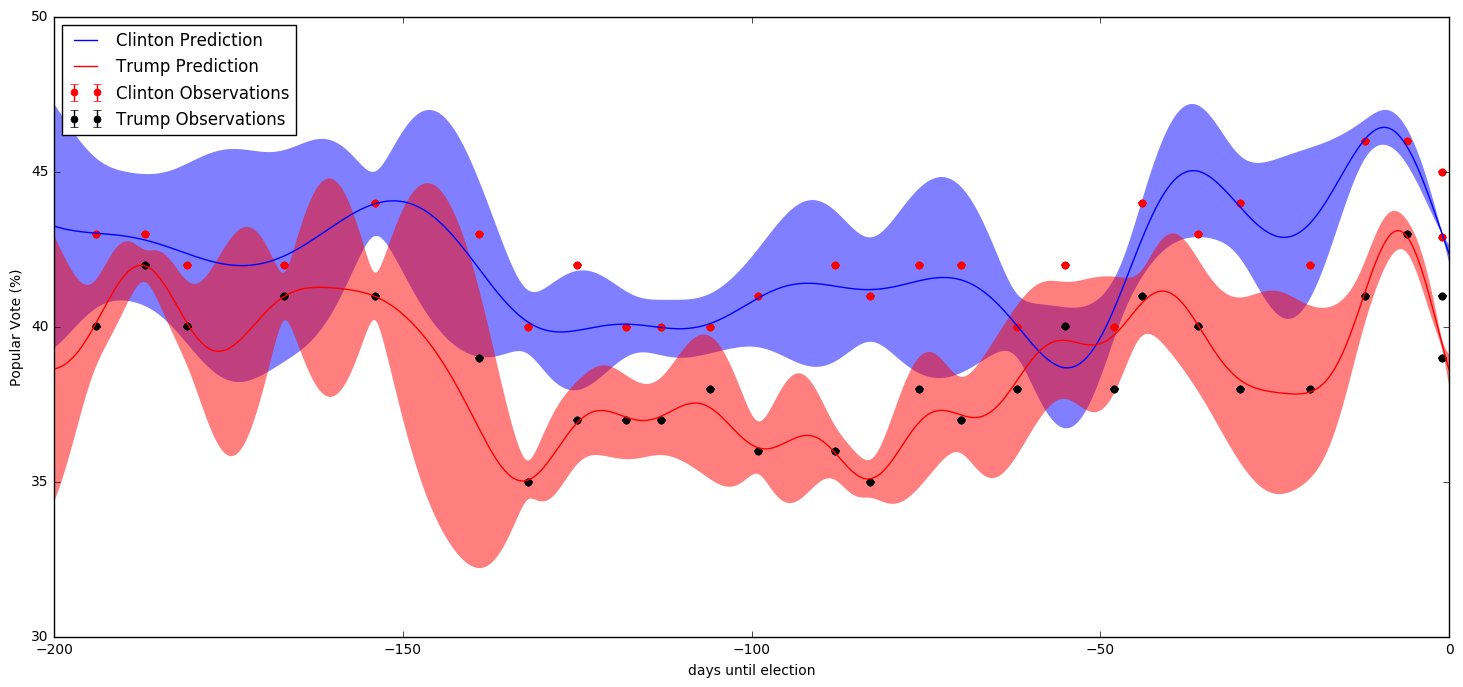

In [39]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(18,8))
Tpy = sigpoll*Ty+mpoll
Tpdy = sigpoll*Tdy
Tpy_pred = sigpoll*Ty_pred+mpoll
Tpsigma = sigpoll*Tsigma 
plt.errorbar(X.ravel(), py, pdy, fmt='r.', markersize=10, label=u'Clinton Observations')
plt.plot(x, py_pred, 'b-', label=u'Clinton Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([py_pred - 1.9600 * psigma,
                        (py_pred + 1.9600 * psigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label=None)
plt.errorbar(X.ravel(), Tpy, Tpdy, fmt='k.', markersize=10, label=u'Trump Observations')
plt.plot(x, Tpy_pred, 'r-', label=u'Trump Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([Tpy_pred - 1.9600 * Tpsigma,
                        (Tpy_pred + 1.9600 * Tpsigma)[::-1]]),
         alpha=.5, fc='r', ec='None', label=None)
plt.xlabel('days until election')
plt.ylabel('Popular Vote (%)')
plt.ylim(30., 50.)
plt.xlim(-200.,0.)
plt.legend(loc='upper left');

#plt.savefig('pres_pred.png',bbox_inches='tight')

So the most interesting thing of note is that the plots that I get are completely different from what the sample notebook got. This is a common feature across all the demonstrations that I've done, and is worthy of deeper thought.